In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Softmax

In [3]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

#setup
nltk.download(['stopwords', 'wordnet'])
#tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Faster lookups
#preview
print("Stopwords sample:", list(stop_words)[:5])

Stopwords sample: ['ve', 'm', 'which', 'ourselves', 'whom']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emails.csv')
working_df = raw_data.drop(["Email No.", "Prediction"], axis=1)

#data check
working_df.sample(15)

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4352,0,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,10,11,11,4,5,2,50,4,4,14,...,0,0,0,0,0,0,0,1,0,0
4937,1,1,2,0,0,0,24,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4123,3,4,1,3,4,4,34,6,0,10,...,0,0,0,0,1,0,0,0,0,0
488,0,1,2,0,1,0,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3905,4,5,5,1,3,2,44,0,2,5,...,0,0,0,0,0,0,0,0,0,0
5083,6,2,2,5,0,1,31,0,1,11,...,0,0,0,0,0,0,0,0,2,0
1241,0,0,1,0,1,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2370,2,3,1,3,1,1,78,2,1,13,...,0,0,0,0,0,0,0,0,2,0
3906,21,19,23,6,3,2,168,3,15,28,...,0,0,0,0,0,0,0,0,1,0


In [5]:
print(type(stop_words))

non_stopword_cols = [col for col in working_df.columns if col not in stop_words]

#diagnostics
print("Filtered columns:", non_stopword_cols)
print("Original columns:", len(working_df.columns))
print("Filtered count:", len(non_stopword_cols))

<class 'set'>
Filtered columns: ['ect', 'hou', 'enron', 'com', 'gas', 'deal', 'meter', 'hpl', 'please', 'e', 'corp', 'know', 'need', 'forwarded', 'new', 'may', 'j', 'mmbtu', 'get', 'see', 'price', 'daren', 'company', 'l', 'let', 'would', 'xls', 'farmer', 'attached', 'us', 'information', 'message', 'day', 'time', 'one', 'http', 'th', 'volume', 'mail', 'contract', 'month', 'robert', 'sitara', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'file', 'email', 'also', 'call', 'change', 'like', 'b', 'flow', 'net', 'following', 'p', 'production', 'back', 'want', 'original', 'ticket', 'c', 'could', 'make', 'inc', 'report', 'march', 'contact', 'days', 'list', 'nomination', 'system', 'april', 'number', 'sale', 'first', 'thanks', 'business', 'help', 'per', 'july', 'forward', 'font', 'free', 'daily', 'use', 'order', 'today', 'r', 'fw', 'set', 'plant', 'statements', 'go', 'gary', 'oil', 'line', 'sales', 'w', 'effective', 'well', 'tenaska', 'take', 'june', 'x', '

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emails.csv')
df = pd.DataFrame(dataset, columns=working_df.columns)  # Using previously filtered columns

print("Final feature count:", len(working_df.columns))

Final feature count: 3000


In [7]:
Main_dataset = df.copy()
Main_predication_dataset = dataset["Prediction"]

main_dataset_train, main_dataset_test, main_predication_train, main_predication_test = train_test_split(
    Main_dataset, Main_predication_dataset, test_size=0.05, random_state=101
)

scaler = StandardScaler()
Main_train = scaler.fit_transform(main_dataset_train)
Main_test = scaler.transform(main_dataset_test)

#neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(Main_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#model training
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#train model
history = model.fit(
    Main_train, main_predication_train,
    epochs=20,
    batch_size=32,
    validation_data=(Main_test, main_predication_test),
    verbose=1
)

#predictions
main_trained = (model.predict(Main_test) > 0.5).astype(int)

#model performance
conf_matrix = confusion_matrix(main_predication_test, main_trained)
f1 = f1_score(main_predication_test, main_trained)
class_report = classification_report(main_predication_test, main_trained)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8481 - loss: 0.3453 - val_accuracy: 0.9768 - val_loss: 0.0657
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9886 - loss: 0.0331 - val_accuracy: 0.9730 - val_loss: 0.0888
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9943 - loss: 0.0171 - val_accuracy: 0.9768 - val_loss: 0.0617
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.9768 - val_loss: 0.0723
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.9730 - val_loss: 0.0867
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9978 - loss: 0.0047 - val_accuracy: 0.9730 - val_loss: 0.1020
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9949 - loss: 0.0185 - val_accuracy: 0.9730 - val_loss: 0.1067
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9951 - loss: 0.0119 - val_accuracy: 0


Model Evaluation Results
Confusion Matrix:
 [[177  10]
 [  1  71]]

F1 Score: 0.9281

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       187
           1       0.88      0.99      0.93        72

    accuracy                           0.96       259
   macro avg       0.94      0.97      0.95       259
weighted avg       0.96      0.96      0.96       259



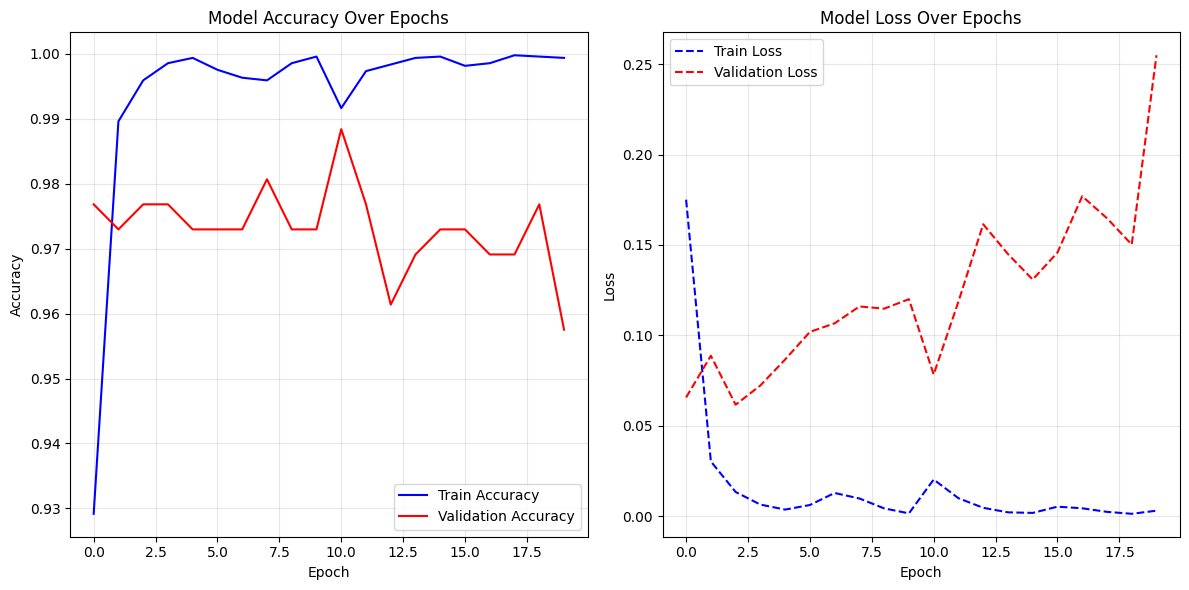

In [8]:
#evaluation metrics
print("\nModel Evaluation Results")
print("="*50)
print("Confusion Matrix:\n", conf_matrix)
print("\nF1 Score: {:.4f}".format(f1))
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(12, 6))

#accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(alpha=0.3)
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b--', label='Train Loss')
plt.plot(history.history['val_loss'], 'r--', label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix,
                           classification_report,
                           f1_score)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Embedding,
                                   LSTM, Bidirectional,
                                   Dropout, Flatten)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [15]:
max_words = 10000
max_len = 200

Main_dataset = df.copy()
Main_predication_dataset = dataset["Prediction"]

X_train, X_test, y_train, y_test = train_test_split(
    Main_dataset,
    Main_predication_dataset,
    test_size=0.2,
    random_state=56
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 46s 289ms/step - accuracy: 0.6854 - loss: 0.6238 - val_accuracy: 0.7169 - val_loss: 0.5940
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.7033 - loss: 0.6114 - val_accuracy: 0.7169 - val_loss: 0.5894
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.7148 - loss: 0.5964 - val_accuracy: 0.7275 - val_loss: 0.5828
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - accuracy: 0.7164 - loss: 0.5938 - val_accuracy: 0.7343 - val_loss: 0.5741
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 38s 295ms/step - accuracy: 0.7207 - loss: 0.5908 - val_accuracy: 0.7343 - val_loss: 0.5713
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.7376 - loss: 0.5718 - val_accuracy: 0.7353 - val_loss: 0.5709
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 40s 288ms/step - accuracy: 0.7384 - loss: 0.5740 - val_accuracy: 0.7372 - val_loss: 0.5692
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - accuracy: 0.7242 - loss: 0


Confusion Matrix:
[[714  28]
 [244  49]]

F1 Score: 0.2649

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       742
           1       0.64      0.17      0.26       293

    accuracy                           0.74      1035
   macro avg       0.69      0.56      0.55      1035
weighted avg       0.71      0.74      0.68      1035



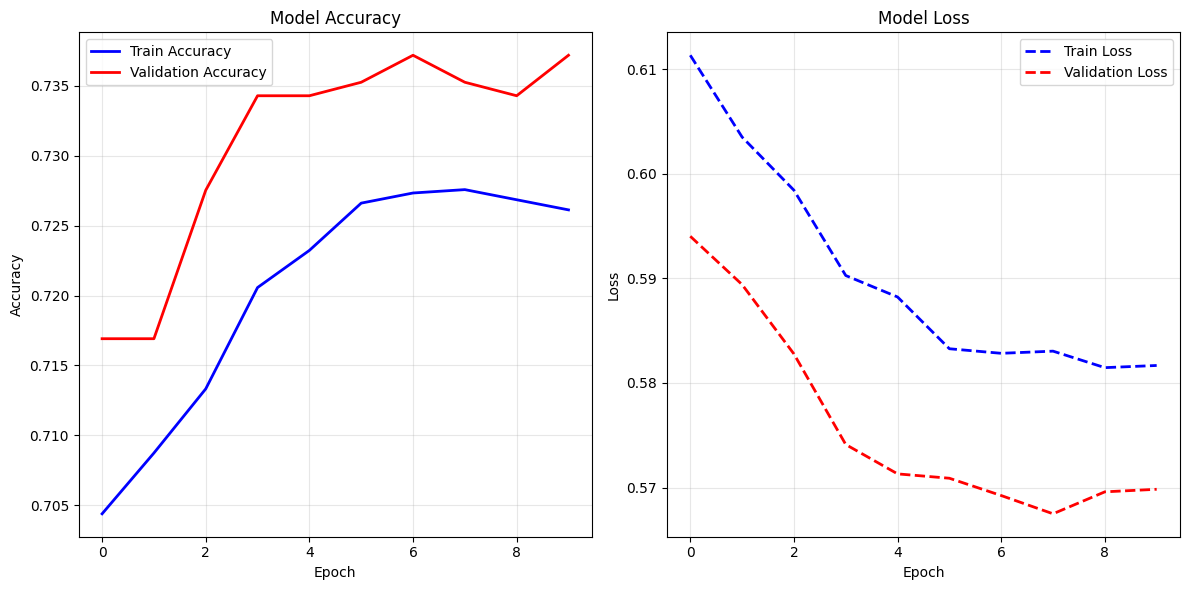

In [17]:
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nF1 Score: {f1:.4f}")
print(f"\nClassification Report:\n{class_report}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', linewidth=2, label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', linewidth=2, label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b--', linewidth=2, label='Train Loss')
plt.plot(history.history['val_loss'], 'r--', linewidth=2, label='Validation Loss')
plt.title('Model Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()